<a href="https://colab.research.google.com/github/RuchengFan/6105/blob/main/OneR_class_with_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


***It is always good to think of how we want our class to be used before we start to write it.***  
**Here is what we can say we would like.**

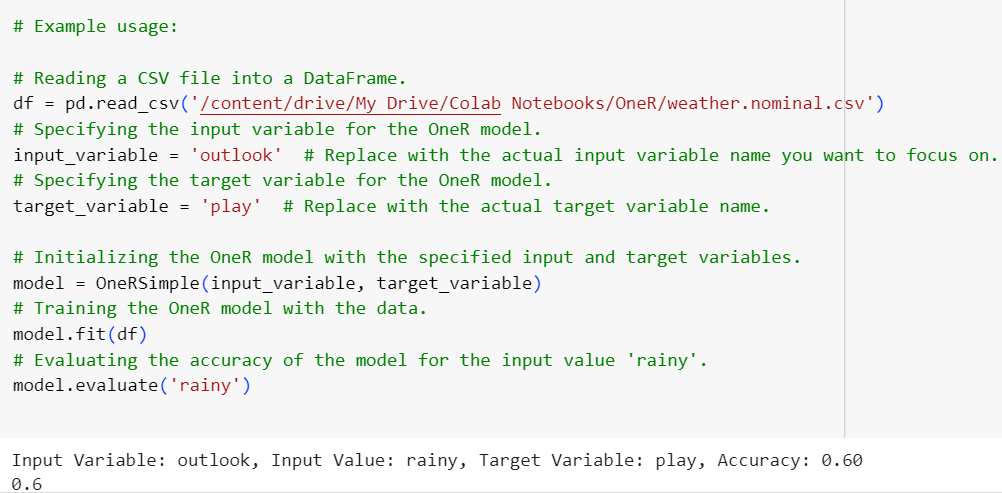


## Pseudo-Code I

### Setup
- **IMPORT** necessary libraries

### OneRSimple Class Definition
- **DEFINE CLASS** "OneRSimple":
    
    - **INITIALIZE** class attributes based on input and target variables
        - **SET** a placeholder for most frequent class for each input value
    
    - **DEFINE a METHOD** to train the model:
        - **STORE** the input data
        - **FOR EACH** unique value in the input data:
            - **FILTER** data based on the unique value
            - **DETERMINE** the most frequent class for this unique value
            - **STORE** the most frequent class
    
    - **DEFINE a METHOD** to evaluate model's accuracy for a specific input value:
        - **RETRIEVE** actual outcomes for the given input value
        - **CALCULATE** number of correct predictions
        - **COMPUTE** accuracy and **PRINT** results
        - **RETURN** accuracy

- **END CLASS**

### Example usage
- **LOAD** dataset into a variable
- **SPECIFY** input and target variables

- **INITIALIZE** the model with specified variables
- **TRAIN** the model with the dataset
- **EVALUATE** the model for a specific input value


## Pseudo-Code II

### Setup
- **IMPORT** pandas library as "pd"

### OneRSimple Class Definition
- **DEFINE CLASS** "OneRSimple":
    
    - **DEFINE CONSTRUCTOR** with parameters `(input_variable, target_variable)`:
        - **SET** self's `input_variable` to `input_variable`
        - **SET** self's `target_variable` to `target_variable`
        - **INITIALIZE** self's `most_frequent_class` as an **EMPTY DICTIONARY**
    
    - **DEFINE METHOD** "fit" with parameter `(df)`:
        - **SET** self's `df` to `df`
        - **FOR EACH** `unique_value` **IN** unique values of df's `input_variable`:
            - **CREATE** a `filtered_df` where df's `input_variable` is **EQUAL** to `unique_value`
            - **CALCULATE** `class_counts` as the frequency of each class in `filtered_df`'s `target_variable`
            - **FIND** the most frequent class from `class_counts` and **STORE** in `most_frequent_class` using `unique_value` as the **KEY**
    
    - **DEFINE METHOD** "evaluate" with parameter `(input_value)`:
        - **FILTER** `df` **WHERE** `input_variable` is **EQUAL** to `input_value` and **GET** the actual outcomes in `target_variable`
        - **CALCULATE** `correct_predictions` as the number of times the actual outcome matches the most frequent class for `input_value`
        - **CALCULATE** `total_instances` as the **LENGTH** of actual outcomes
        - **IF** `total_instances` > 0:
            - **CALCULATE** `accuracy` as `correct_predictions` divided by `total_instances`
        - **ELSE**:
            - **SET** `accuracy` to 0.0
        - **PRINT** "Input Variable", "Input Value", "Target Variable", and "Accuracy"
        - **RETURN** `accuracy`

- **END CLASS**

### Example usage
- **LOAD** a CSV file into a variable called "df"
- **SET** `input_variable` to 'outlook'
- **SET** `target_variable` to 'play'
- **INITIALIZE** an **OBJECT** "model" of **CLASS** "OneRSimple" with parameters `(input_variable, target_variable)`
- **CALL** `fit` **METHOD** of `model` using `df` as parameter
- **CALL** `evaluate` **METHOD** of `model` with parameter 'rainy'


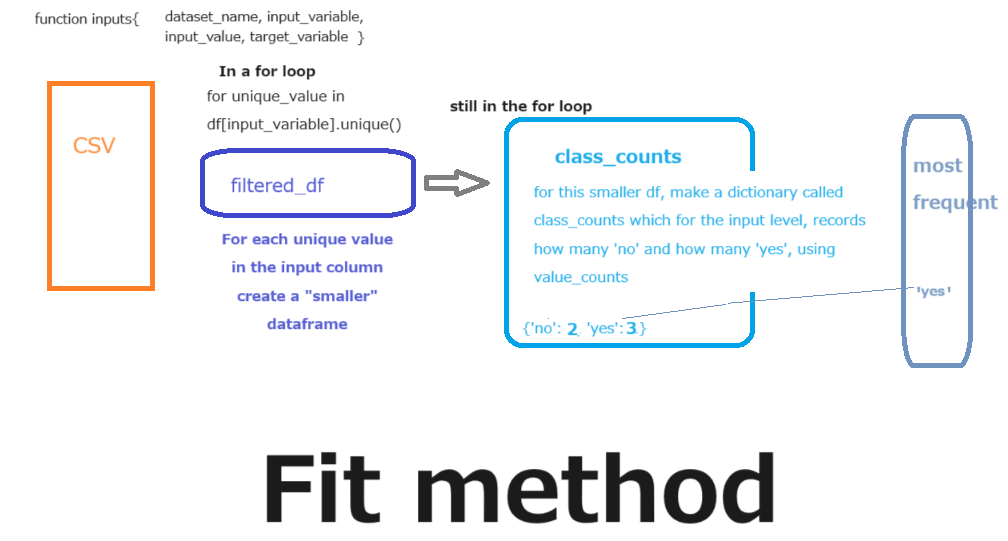

### **The fit() method generates and holds our rules**

We will see shortly that the "most frequent" drawn above in bluish gray
may look something like this:
```
most_frequent_class = {'sunny': 'no', 'overcast': 'yes', 'rainy': 'yes'}
```
Thus it holds our rules. Rules like,
```
if it is sunny then don't play golf
```

When you see a line like `self.input_variable = input_variable` below, inside a class method, especially in the `__init__` method, it's all about object-oriented programming and how instances of classes (i.e., objects) maintain and manage their own state.

## Here's a breakdown:

- **self**:
  In Python, the first parameter of any method inside a class is a reference to the instance of the object itself. By convention, this parameter is named `self`. When you create an instance of a class, `self` refers to that specific instance. Using `self`, you can access or modify the object's attributes or call other methods of the object.

- **Instance Variables**:
  In the context of object-oriented programming, data attributes (or fields) that belong to an instance of a class (as opposed to the class itself) are called instance variables. They are prefixed with `self` inside class methods to indicate that they are attributes of the instance. For example, `self.input_variable` is an instance variable.

- **Why `self.input_variable = input_variable`?**:
  When you instantiate the OneRSimple class, you might do something like: `model = OneRSimple("outlook", "play")`. Here, "outlook" and "play" are arguments passed to the `__init__` method. Inside `__init__`, these arguments are locally named `input_variable` and `target_variable`, respectively. The line `self.input_variable = input_variable` takes the local `input_variable` argument and assigns its value to the instance variable `self.input_variable`. This makes the value "outlook" (from the example) persist with the model object. This way, even after the `__init__` method finishes execution, other methods of the model object can still access this value via `self.input_variable`.

- **The Benefit**:
  Using instance variables allows each instance of the class to maintain its own state. So, if you were to create another instance of OneRSimple with different input and target variables, it wouldn't interfere with or overwrite the attributes of the first instance. Each instance is independent.

In summary, the pattern `self.something = something` in the `__init__` method is a way to initialize instance variables, allowing objects to maintain and manage their individual state throughout their lifetime.


### Just for a visual representation of
```

self.df[self.df['Outlook'] == 'Sunny'] ['Play']
```

which will occur below, and it is called
```
actual_outcomes
```
In math notation this is called y (as opposed to y_hat) and it will look like this:


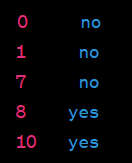


It is the actual values in the dataset for the output variable, and we will wan to see (in our evaluate method) how many times our predictions match the actual values.


And it comes from this:

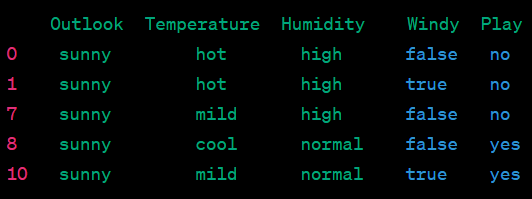

In [ ]:
# Importing the pandas library as pd.
import pandas as pd

# Defining the OneRSimple class for the OneR implementation.
class OneRSimple:

    # The constructor for the OneRSimple class which initializes input and target variables.
    def __init__(self, input_variable, target_variable):
        self.input_variable = input_variable  # Setting the input variable.
        self.target_variable = target_variable  # Setting the target variable.
        self.most_frequent_class = {}  # Initializing an empty dictionary to store the most frequent class for each input value.

    # Method to train the OneR model.
    def fit(self, df):
        self.df = df  # Storing the input DataFrame.
        # Looping over each unique value in the input variable.
        for unique_value in self.df[self.input_variable].unique():
            # Filtering the DataFrame to get rows where the input variable matches the current unique value.
            filtered_df = self.df[self.df[self.input_variable] == unique_value]
            # Counting the number of occurrences of each class in the target variable for the current input value.
            class_counts = filtered_df[self.target_variable].value_counts()
            # Finding the class with the most occurrences.
            most_frequent = class_counts.idxmax()
            # Storing the most frequent class for the current input value in the dictionary.
            # In the first iteration, we may get:
            # self.most_frequent_class = {'sunny': 'no'}
            # Then in the next iteration we may have:
            # self.most_frequent_class = {'sunny': 'no', 'overcast': 'yes'}
            # Finally in the last iteration it may look like:
            # self.most_frequent_class = {'sunny': 'no', 'overcast': 'yes', 'rainy': 'yes'}
            self.most_frequent_class[unique_value] = most_frequent

    # Next, method to evaluate the accuracy of the OneR model for a specific input value.
    # Note that input_value, below, is not input_variable from above.
    # for example, we can call evaluate like this: model.evaluate('rainy')
    # and the kind of result we want to get from this is:

    # Input Variable: outlook, Input Value: rainy, Target Variable: play, Accuracy: 0.60
    def evaluate(self, input_value):

# Below, the line

#      actual_outcomes    =    self.df[self.df[self.input_variable] == input_value] [self.target_variable]
# for example:
#      actual_outcomes    =    self.df[self.df['Outlook'] == 'Sunny'] [self.target_variable]

#     this                             self.df['Outlook'] == 'Sunny'      is the Boolean mask.

#     so this                  self.df[self.df['Outlook'] == 'Sunny'] is a filtered DataFrame using the Boolean mask.

#     so this                  self.df[self.df['Outlook'] == 'Sunny'] ['Play']   extracts just the 'Play' column from this filtered DataFrame
#                                                                                just the 'Play' column when we have outlook is 'sunny'

# can be divided into parts for a more granular understanding:

# 1. self.df:
#    This refers to the DataFrame 'df' that was passed to the 'fit' method earlier and stored as an instance variable.
#    It represents the dataset on which the OneR model was trained.

# 2. self.input_variable:
#    This instance variable stores the name of the input feature (or column) we're interested in.
#    For instance, it could be a column like "outlook" from a weather dataset.

# 3. input_value:
#    This is a value for the aforementioned input feature (like "sunny" or "rainy" if the feature is "outlook").
#    In class I called this a "level", which is terminology from R.
#    We're interested in filtering the dataset to only include rows where the input feature has this value.

# 4. self.df[self.input_variable] == input_value:
#    This part of the code creates a boolean mask. For each row in 'self.df', it checks if the value in the column
#    'self.input_variable' matches 'input_value'. This results in a Series of boolean values (True or False)
#    indicating which rows satisfy the condition.

# 5. self.df[...][self.target_variable]:
#    Now, using the boolean mask created in step 4, we're filtering the DataFrame 'self.df' to only keep rows
#    that satisfy our condition. After filtering, we're then indexing it further to select only the column
#    'self.target_variable'. This could be a column like "play" in a weather dataset, indicating if one would
#    play or not based on the weather.

# 6. actual_outcomes:
#    The result of all the above steps is stored in 'actual_outcomes'. It's a Series containing values
#    from the 'self.target_variable' column, but only for rows where 'self.input_variable' matches 'input_value'.
#    For instance, if our dataset is about weather and sports, and if 'input_value' is "rainy" and 'self.target_variable'
#    is "play", then 'actual_outcomes' would contain values like "yes" or "no" indicating if one played or not
#    on rainy days.

# In summary, this line is essentially fetching all the outcomes for a specific condition
# (e.g., all instances where the outlook was "rainy" and then seeing if the game was played or not on those days).



        # Filtering the DataFrame to get the actual outcomes of the target variable for the input value.

        actual_outcomes = self.df[self.df[self.input_variable] == input_value][self.target_variable]
        # Counting the number of correct predictions made by the model for the input value.
        # Recall that from the fit method, most_frequent_class could look like
        # {'sunny': 'no', 'overcast': 'yes', 'rainy': 'yes'}
        # And so the RHS of ==    could will be either 'yes' or 'no'
        # In math notation, below we are checking how many times our actual outcomes
        # (we saw an image of that above), match the predicted value, which comes from
        # the most frequent class.
        # One more point. sum() is being applied to a boolean mask (or as I like to say
        # a boolean vector). As far as the sum() function is concerned, True is a 1 and False is a 0.
        # so in effect we are counting how many Trues there are. Meaning, we are counting
        # how many times our predictions == the actual outcomes.
        correct_predictions = sum(actual_outcomes == self.most_frequent_class[input_value])
        # Calculating the total number of instances for the input value.
        total_instances = len(actual_outcomes) # This will give us the denominator
        # in a calculation like 3/5 of the time our prediction is correct.

        # Calculating the accuracy if there are any instances, otherwise setting it to 0.
        if total_instances > 0:
            accuracy = correct_predictions / total_instances
        else:
            accuracy = 0.0  # We don't want to divide by 0.

        # Printing the results.  # Note that target_variable was
        # one of the parameters of our OneRSimple class (it was defined in the __init__ method)
        print(f"Input Variable: {self.input_variable}, Input Value: {input_value} ,Target Variable: {self.target_variable}, Accuracy: {accuracy:.2f}")
        # Returning the calculated accuracy.
        return accuracy

# Example usage:

# Reading a CSV file into a DataFrame.
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/OneR/weather.nominal.csv')
# Specifying the input variable for the OneR model.
input_variable = 'outlook'  # Replace with the actual input variable name you want to focus on.
# Specifying the target variable for the OneR model.
target_variable = 'play'  # Replace with the actual target variable name.

# Initializing the OneR model with the specified input and target variables.
model = OneRSimple(input_variable, target_variable)
# Training the OneR model with the data.
model.fit(df)
# Evaluating the accuracy of the model for the input value 'rainy'.
model.evaluate('rainy')


Input Variable: outlook, Input Value: rainy ,Target Variable: play, Accuracy: 0.60


0.6